In [1]:
#!/usr/bin/env python
"""A simple example of plotting the stellar mass function (SMF) from Meraxes
output using multiple snap shots"""

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from Functions import *
from dragons import meraxes, munge # DRAGONS modules for reading and dealing with model ouput

# First set the requested Hubble parameter value.
# By specifying h=0.7, we are ensuring that all of the galaxy properties
# are converted to a Hubble constant of H0=70 km/s/Mpc when they are read in.
#
# Note that if you want to set the hubble value to the actual value
# corresponding to the cosmology of the input N-body simulation then just pass `fname_in` to `set_little_h`
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)



snaps:  [100 115 134 158 173 192 216 250]
redshifts:  [4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
light travel time:  [12231.24679633 11881.54868823 11283.32371736 10185.99335738
  9241.64988071  7682.30347798  5035.97124274     0.        ]


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/pandas

'# uncomment for separate plots\nfig, ax = plt.subplots(1, 1)\nax.plot(plot_100, plot_115, plot_134, plot_158, plot_173, plot_192, plot_216, plot_250) # plotting all \n# Set the axis labels.\n# Note the use of LaTeX here.\nax.set_xlabel(r"$\\log_{10}(M_* / {\rm M_{\\odot}})$")\nax.set_ylabel(r"$\\log_{10}(\\phi / {\rm Mpc^3})$")\n\n# Add the legend\nax.legend(loc="lower left")\n\n# Finally save the figure as a PDF\nplt.tight_layout()\nname_of_plot=("smf_" + snap_number)\nplt.savefig("plots/" + name_of_plot + ".pdf")\n'

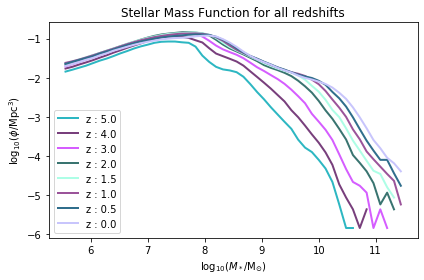

In [2]:
# First read in all of the galaxies at snapshot 100 (z=5).  Note that you will
# of course need to update the paths to any files appropriately.
#
# By specifying `sim_props=True` when reading the galaxies, we are also
# returned a dictionary of properties for the Meraxes run we are reading.
#gals, sim_props = meraxes.read_gals(fname_in, snapshot=100, sim_props=True)

    
#We want to read in all the snap shots using the function 'read snaplist'. Little h previously set as 0.7
snaplist = meraxes.io.read_snaplist(fname_in, h)
snaps = snaplist[0]
redshifts=snaplist[1]
lt_times=snaplist[2]
print ('snaps: ', snaps)
print('redshifts: ', redshifts)
print('light travel time: ', lt_times)
range_in = (5.5, 11.5)


''' comment out for individual plots'''
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
plt.title("Stellar Mass Function for all redshifts")

# for each snapshot...
for i in snaps:
    # 
    #gsp_foreach_snap = []

    #print('snap', [i], 'read')
    gals, sim_props, snaplist = get_gal_catalogue(i)


    #print('gals: ', gals)
    #print('sim_props: ', sim_props)
    #gsp_foreach_snap.append(gals) #add the galaxies to the array
    #gsp_foreach_snap.append(sim_props)#add the simulation properties to the array
    #print('new array item:', gsp_foreach_snap)
    snaplist_index_used = list(snaplist[0]).index(i)# convert to list and find the index of the snap we are using
    redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
    redshift_used = round(redshift_used, 1) # round float to nearest whole int
    redshift_used = str(redshift_used)
    redshift_used
    
    # You can also see the units of all galaxy properties (and grids properties if
    # they are present).  Here I am only printing the galaxy properties.
    #units = meraxes.read_units(fname_in)
    #print('\nunits\n=====')
    #for k, v in units.items():
    #    if not isinstance(v, dict):
    #        print(k, ':', v.decode('utf-8'))
    #print()

    # The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
    # this to log10(M/Msol).
    gals["StellarMass"] = np.log10(gals["StellarMass"]*1e10)
    #print('gals: ', gals["StellarMass"])

    # The `munge` module has a nice function that will calculate the mass function
    # for us.  Take a look at the source code for this function if you are
    # interested to see how it does this (recommended).
    # mf = "mass function"
    mf = munge.mass_function(gals["StellarMass"], sim_props["Volume"], bins=50,
                             range=range_in)
    #print('new mf array item: ', mf)
    # Now let's plot the mass function...
    ''' uncomment for separate plots
        # Create a new figure (with 1 column and 1 row) and axis
        fig, ax = plt.subplots(1, 1)
    '''
    # Plot the mass function
    plot_label = ('z : ' + redshift_used)
    #print(plot_number)
    
    ax.plot(mf[:, 0], np.log10(mf[:, 1]), color=np.random.rand(3,), lw=2,
            label=plot_label)

    # Set the axis labels.
    # Note the use of LaTeX here.
    ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
    ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

    # Add the legend
    ax.legend(loc="lower left")

    # Finally save the figure as a PDF
    plt.tight_layout()
name_of_plot=("SMF_allzs")
plt.savefig("plots/" + name_of_plot + ".pdf")

'''# uncomment for separate plots
fig, ax = plt.subplots(1, 1)
ax.plot(plot_100, plot_115, plot_134, plot_158, plot_173, plot_192, plot_216, plot_250) # plotting all 
# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
name_of_plot=("smf_" + snap_number)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''